<h1 style="text-align:center;;font-weight:bold"><i>Assignment - 1</i></h1>
<h3 style="text-align:center;;font-weight:bold"><i>Twitter Sentiment Analysis</i></h3>
<h3 style="text-align:center">Vijay Kumar, 12th Dec. ,2021</h3>
<h4 style="text-align:center">Email: 2020aiml525@wilp.bits-pilani.ac.in</h4>

### ***What is Sentiment Analysis?***
Sentiment analysis or opinion mining is a simple task of understanding the emotions of the writer of a particular text. What was the intent of the writer when writing a certain thing?

Sentiment Analysis (also known as opinion mining or emotion AI) is a sub-field of NLP that measures the inclination of people’s opinions (Positive/Negative/Neutral) within the unstructured text.

We use various natural language processing (NLP) and text analysis tools to figure out what could be subjective information. We need to identify, extract and quantify such details from the text for easier classification and working with the data.

In simple word using sentiment analysis we try to predict the types of any review if it is postive ,negative or neutral.

### ***But why do we need sentiment analysis?***
Sentiment analysis serves as a fundamental aspect of dealing with customers on online portals and websites for the companies. They do this all the time to classify a comment as a query, complaint, suggestion, opinion, or just love for a product. This way they can easily sort through the comments or questions and prioritize what they need to handle first and even order them in a way that looks better. Companies sometimes even try to delete content that has a negative sentiment attached to it. 

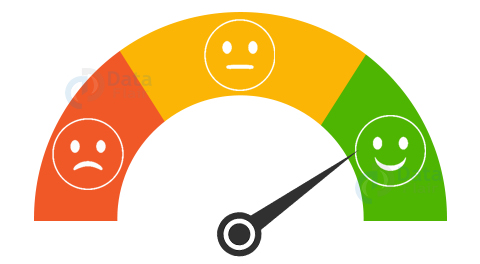

### ***Few applications of Sentiment Analysis:***
1. Market analysis
2. Social media monitoring
3. Customer feedback analysis – Brand sentiment or reputation analysis
4. Market research

### ***Two basic techniques for sentiment analysis***
Sentiment Analysis can be performed using two approaches: 
* **`1. Rule-based`**:
The first technique is rules-based and uses a dictionary of words labelled by sentiment to determine the sentiment of a sentence. Sentiment scores typically need to be combined with additional rules to mitigate sentences containing negations, sarcasm, or dependent clauses.
<br>
Sentiment Dictionary Example:

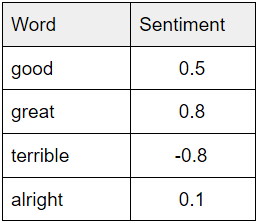
<br><br>
There is a predefined list of words for each type of sentiment needed and then the text or document is matched with the lists. The algorithm then determines which type of words or which sentiment is more prevalent in it.
This type of rule based sentiment analysis is easy to implement, but lacks flexibility and does not account for context.
<br><br>
The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.
Widely used lexicon-based approaches are **TextBlob, VADER, SentiWordNet**.

* **`2. Machine Learning based`**:
Here, we train an ML model to recognize the sentiment based on the words and their order using a sentiment-labelled training set. This approach depends largely on the type of algorithm and the quality of the training data used.<br><br>
They are mostly based on supervised machine learning algorithms and are actually very useful in understanding complicated texts. Algorithms in this category include **support vector machine**, **linear regression**, **classification algorithm**.
<br>
<br>
Below is the Machine Learning Based Approach.

### ***1) Import required libraries - 2 Mark***

In [85]:
#importing all the required libraries
import nltk
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import LinearSVC,SVC

from sklearn.metrics import (classification_report,
                             f1_score,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             confusion_matrix)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [134]:
# reading the file
df=pd.read_csv("Corona_NLP_train.csv",encoding='ISO-8859-1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [135]:
tweet_data=df[['OriginalTweet','Sentiment']]
tweet_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### ***Exploratory Data Analysis*** 

In [10]:
group_df=df[['Sentiment','TweetAt']].groupby('Sentiment').count()
group_df['%Sentiment']=(group_df['TweetAt']/len(df['Sentiment']))*100
group_df

,TweetAt,%Sentiment
Sentiment,,
Extremely Negative,5481,13.317297
Extremely Positive,6624,16.094468
Negative,9917,24.095537
Neutral,7713,18.740433
Positive,11422,27.752266


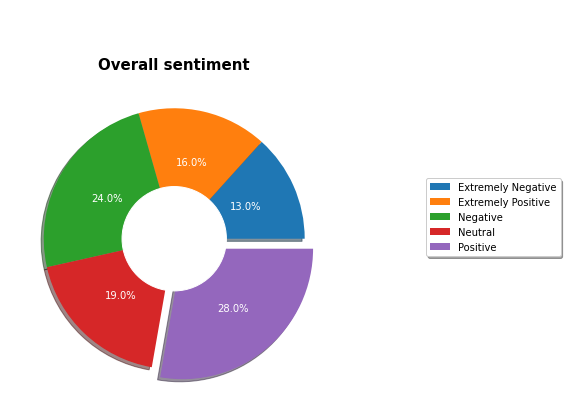

In [186]:
#overall sentiment 

#making the function to display the actaul values of Literacy rate
def absolute_value(val):
    a  = str(np.round(val/100.*group_df['%Sentiment'].sum(), 0))+'%'
    return a

plt.figure(figsize=(16,6))
# Create a circle at the center of the plot
# making a circle with color white
my_circle = plt.Circle( (0,0), 0.4, color='white')

explode = (0, 0, 0,0,0.1)
plt.pie(group_df['%Sentiment'], 
        labels=group_df.index,
        shadow=True,
        rotatelabels=True,
        explode=explode,
        autopct=absolute_value)
plt.rcParams['text.color'] = 'white'
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
leg=plt.legend(loc ="upper right",fontsize=10,shadow=True,bbox_to_anchor=(1.7, 0.7))

# this is to set the legend text color to black
for text in leg.get_texts():
    text.set_color("black")
plt.title("Overall sentiment",fontdict={'fontsize':15,'fontweight':'bold','color':'black'})
plt.show()

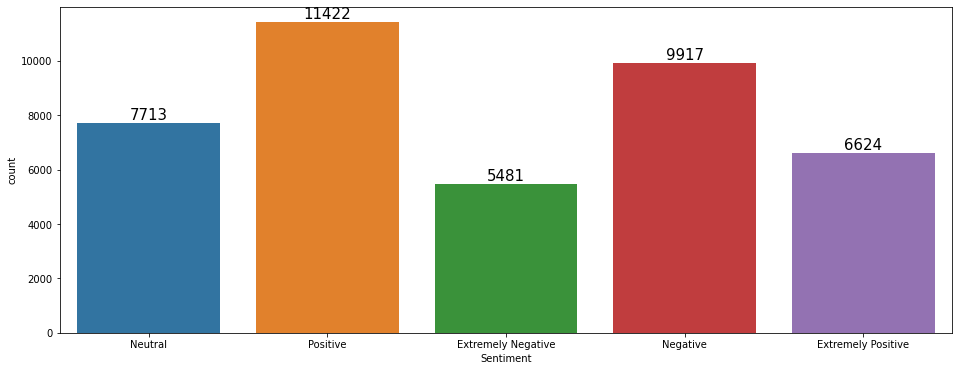

In [90]:
# overall count of each sentiment 
plt.figure(figsize=(16,6))
plots=sns.countplot(df['Sentiment'])
for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), ''),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()),ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 
plt.show()

### **Preprocessing of text contain some of the steps:**
#### 1. Removing punctuations like . , ! $( ) * % @
#### 2. Removing URLs
#### 3. Removing Stop words
#### 4. Lower casing
#### 5. Tokenization
#### 6. Stemming
#### 7. Lemmatization

### ***Removing punctuations***
In this step, all the punctuations from the text are removed. string library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [97]:
#defining the function to remove punctuation
def remove_punctuation(data,column):
    print(column)
    import string
    punctuationfree=[]
    for word in data[column]:
        text="".join([i for i in word if i not in string.punctuation])
        punctuationfree.append(text)
    data[column]=punctuationfree
    return data

### ***Removing Special Character*** 

In [98]:
# removing special character
def remove_ascii(data,column):
    data[column]= data[column].apply(lambda x: x.encode("ascii", "ignore"))
    data[column]=data[column].str.decode("utf-8")
    return data

### ***Replacing numbers***

In [99]:
# replacing numbers
def replace_numbers(data,column):
    new_words = []
    for text in data[column]:
            newstring = "".join([i for i in text if not i.isdigit()])
            new_words.append(newstring)
    data[column]=new_words
    return data

### ***Remove Urls***

In [100]:
# remove url from the dtring if any
import re
def remove_URL(df,column):
    urlfree=[]
    for word in df[column]:
        text=re.sub(r"http\S+", "", word)
        urlfree.append(text)
    df[column]=urlfree
    return df

### ***Lower Casing***

In [101]:
# Lower caseing
def to_lower(data,column):
    data[column]= data[column].apply(lambda x: x.lower())
    return data

### ***Tokenization***
Splitting the sentences into words of token.Ex-"I am reading book"-> ["I","am","reading","book"]

In [102]:
# tokenization
def do_tokenization(data,column):
    from nltk.tokenize import word_tokenize
    tokens=[]
    for word in data[column]:
        tokens.append(word_tokenize(word))
    data[column]=tokens
    return data

### ***Removing Stop words***
“Stop words” are the most common words in a language like “the”, “a”, “on”, “is”, “all”. These words do not carry important meaning and are usually removed from texts. Ex:- "I am reading book"-> "reading book".

In [103]:
#importing nlp library
def remove_stopwords(data,column):
#     output=column+'_witout_stopword'
    import nltk
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(['would','u'])
    output_word=[]
    for text in data[column]:
        t=[i for i in text if i not in stopwords]
        output_word.append(t)
    data[column]=output_word
    return data

### **Lemmatization:**
It stems the word but makes sure that it does not lose its meaning.  Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing. Ex:-"reading" -> "read".

In [104]:
def do_Lemmatizer(data,column):
    from nltk.stem import WordNetLemmatizer
    Lemmatizer = WordNetLemmatizer()
#     output=column+'_stemming'
    output_text=[]
    for text in data[column]:
        stem_text = [Lemmatizer.lemmatize(word) for word in text]
        output_text.append(stem_text)
    data[column]=output_text
    return data

### ***Make Sentences***

In [105]:
def make_sentences(data,column):
    data[column]=data[column].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[column]=data[column].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    return data

### ***2) Read dataset and perfom Text processing for the tweets ( Remove Stop words , special characters and convert the text to lowercase ) - 3 Mark***
Calling all the function in sequence to process the row text

In [136]:
import time
from sklearn.pipeline import Pipeline
def text_preprocessing(data,c):
    
    # making a list of all functions
    func_list=[remove_punctuation,
              remove_ascii,
               replace_numbers,
               remove_URL,
              to_lower,
              do_tokenization,
              remove_stopwords,
              do_Lemmatizer,
              make_sentences
              ]
    for function in func_list:
        data=function(data,c)
    return data

#making a copy of data before making any changes
row_df=tweet_data.copy()
tweet_df=text_preprocessing(row_df,'OriginalTweet')
tweet_df.head()

OriginalTweet


,OriginalTweet,Sentiment
0,menyrbie philgahan chrisitv,Neutral
1,advice talk neighbour family exchange phone nu...,Positive
2,coronavirus australia woolworth give elderly d...,Positive
3,food stock one empty please dont panic enough ...,Positive
4,ready go supermarket covid outbreak im paranoi...,Extremely Negative


Converting String values to Numerical

In [137]:
def replace_Sentiment(data):
    if(data=='Neutral'):
        return 0
    elif(data=='Positive' or data=='Extremely Positive'):
        return 1
    else:
        return -1
tweet_df['Sentiment']=tweet_df['Sentiment'].apply(replace_Sentiment)

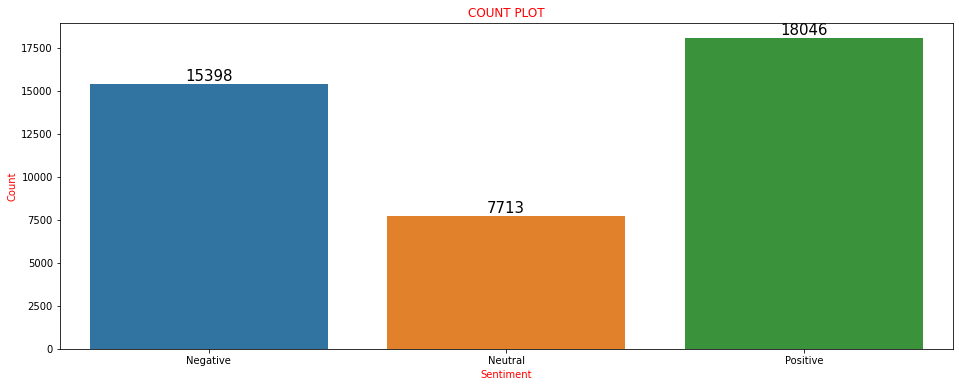

In [139]:
plt.figure(figsize=(16,6))
plots=sns.countplot(tweet_df['Sentiment'])
for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), ''),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()),ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xlabel('Sentiment', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('COUNT PLOT', color = 'r')
plt.show()

### ***Word Cloud***
A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [115]:
# Generating the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordCloud(data):
    plt.figure(figsize=(16,6)) 
    wordCloud = WordCloud(background_color='white')
    
    # joining all the word from list into single string
    w_text = " ".join(data) 
    wordCloud.generate_from_text(w_text)
    
    plt.title('Most frequently occurring Word')
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

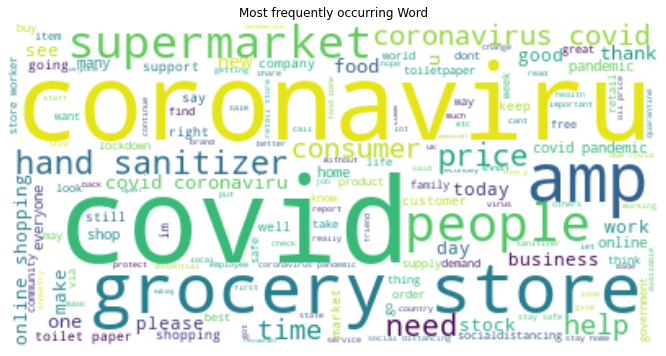

In [116]:
# word cloud for positive tweet
generate_wordCloud(tweet_df[tweet_df['Sentiment']==1]['OriginalTweet'])

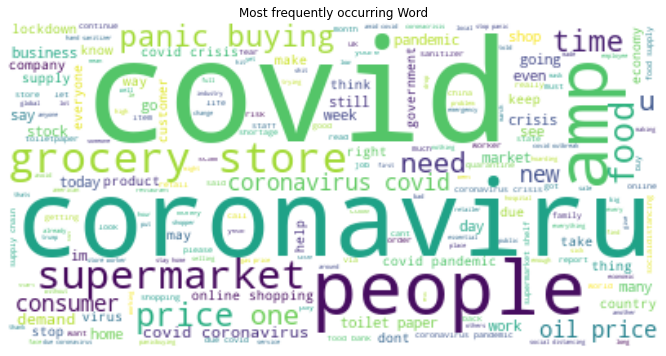

In [117]:
# word cloud for Negative tweet
generate_wordCloud(tweet_df[tweet_df['Sentiment']==-1]['OriginalTweet'])

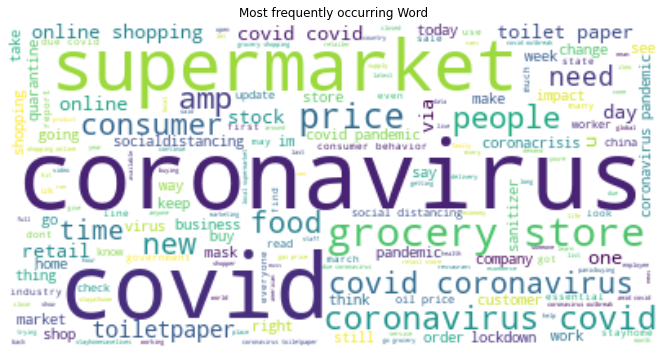

In [118]:
# word cloud for Neutral tweet
generate_wordCloud(tweet_df[tweet_df['Sentiment']==0]['OriginalTweet'])

### ***Extracting Features from cleaned Tweets***
* **`Bag-of-Words Features:`**Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set.

Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

For example, if you have 2 documents-

    D1: He is a lazy boy. She is also lazy.
    D2: Smith is a lazy person.

First, it creates a vocabulary using unique words from all the documents.

[‘He’ , ’She’ , ’lazy’ , ‘boy’ , ‘Smith’ , ’person’]

As we can see in the above list we don’t consider “is” , “a” , “also” in this set because they don’t convey the necessary information required for the model.

    Here, D=2, N=6
    The matrix M of size 2 X 6 will be represented as:
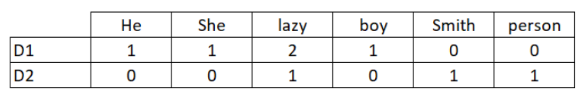

The above table depicts the training features containing term frequencies of each word in each document. This is called bag-of-words approach since the number of occurrence and not sequence or order of words matters in this approach.<br>
We have a package called **CountVectorizer** to perform this task.
<br>
* **`TF-IDF Features:`**
Term Frequency (tf): gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.
$$
  tf_(i,j)=\frac{n_(i,j)}{\sum\limits_{k}n_(i,j)}
$$
Inverse Data Frequency (idf): used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below.
$$
  idf=log(\frac{N}{df_(t)})
$$
Combining these two we come up with the TF-IDF score (w) for a word in a document in the corpus. It is the product of tf and idf:
$$
 w_(i,j)=tf_(i,j)*idf
$$
We have a package available for this in Scikit-Learn known as **TfidfVectorizer**.

In [112]:
def feature_extract(data,vector):
    from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
    from nltk.tokenize import word_tokenize
    vector=vector.lower()
    if(vector=='countvector'):
        vectr = CountVectorizer(tokenizer=word_tokenize)
        tfidf_data=vectr.fit_transform(data)
        print('Count Vectorization done!!')
        return tfidf_data
    else:
        vectr = TfidfVectorizer(tokenizer=word_tokenize)
        tfidf_data=vectr.fit_transform(data)
        print('Tfidf Vectorization done!!')
        return tfidf_data

In [140]:
# feature and target variables
X=feature_extract(tweet_df['OriginalTweet'],'countvector')
y=tweet_df['Sentiment']

Count Vectorization done!!


### ***3) Using the train_test_split function of Sklearn, Split train and test dataset - 1 Mark***

### ***Train and Test Split***

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
print(f'Train Length:{X_train.shape}')
print(f'Test Length:{X_test.shape}')

Train Length:(32925, 53623)
Test Length:(8232, 53623)


### ***4) Create pipeline and define parameters for GridSearch ( You might Refer the code below ) - 1 Mark***

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
pipe = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

### ***5) Perform classification (using GridSearch) - 3 Mark***

In [148]:
x_train,x_test,y_train,y_test=train_test_split(tweet_df['OriginalTweet'],tweet_df['Sentiment'],test_size=0.3,random_state=41,stratify=y)
from sklearn.metrics import classification_report
clf = GridSearchCV(pipe, tuned_parameters, cv=20, scoring='accuracy',n_jobs=-1)
clf.fit(x_train, y_train)
y_pr=clf.predict(x_test)
cm=confusion_matrix(y_test,y_pr)
print(y_pr[0:5])

[-1 -1  1  1  1]


In [187]:
clf.best_params_

{'clf__alpha': 0.1,
 'tfidf__norm': 'l2',
 'tfidf__use_idf': False,
 'vect__ngram_range': (1, 1)}

### ***6) Print the confusion matrix, accuracy, F1 score on the test dataset - 2 Mark***

In [149]:
print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
print('Precision:%.2f'%precision_score(y_test, y_pr,average='weighted'))
print('Recall:%.2f'%recall_score(y_test, y_pr,average='weighted'))
print('F1-Score:%.2f'%f1_score(y_test, y_pr,average='weighted'))
report=classification_report(y_test,y_pr)
print(report)

Accuracy:0.67
Precision:0.69
Recall:0.67
F1-Score:0.63
              precision    recall  f1-score   support

          -1       0.70      0.72      0.71      4620
           0       0.78      0.15      0.25      2314
           1       0.64      0.84      0.73      5414

    accuracy                           0.67     12348
   macro avg       0.70      0.57      0.56     12348
weighted avg       0.69      0.67      0.63     12348



### ***Support Vector Machine***

Accuracy:0.76
Precision:0.76
Recall:0.76
F1-Score:0.76
--------------Confusion Matrix, Classification report------------

              precision    recall  f1-score   support

          -1       0.75      0.78      0.77      3080
           0       0.63      0.67      0.65      1526
           1       0.83      0.78      0.80      3626

    accuracy                           0.76      8232
   macro avg       0.74      0.74      0.74      8232
weighted avg       0.76      0.76      0.76      8232



<AxesSubplot:>

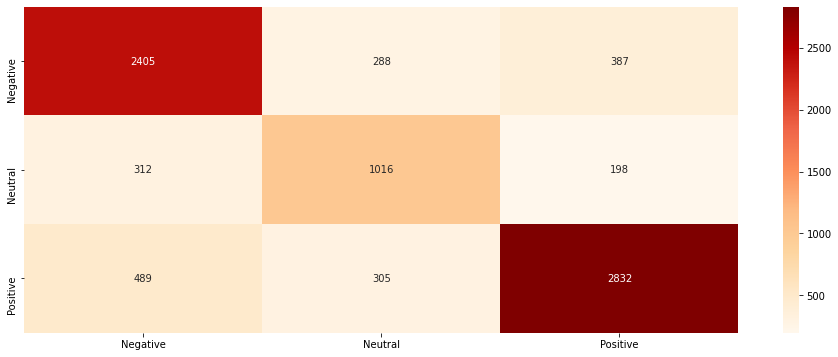

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

from sklearn.svm import LinearSVC,SVC
svm=SVC(kernel='linear',C=8,probability=True)
model=svm.fit(X_train,y_train)
y_pred=model.predict(X_test)

print('Accuracy:%.2f'%accuracy_score(y_test, y_pred))
print('Precision:%.2f'%precision_score(y_test, y_pred,average='weighted'))
print('Recall:%.2f'%recall_score(y_test, y_pred,average='weighted'))
print('F1-Score:%.2f'%f1_score(y_test, y_pred,average='weighted'))

print('--------------Confusion Matrix, Classification report------------')
print()
cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(report)
plt.figure(figsize=(16,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='OrRd',xticklabels=['Negative','Neutral','Positive'],yticklabels=['Negative','Neutral','Positive'])

In [119]:
# function to call model and make prediction
def predict_sentiment(model,string):
    string=vectr.transform([string])
    output=model.predict(string)[0]
    if(output==0):
        return 'Neutral'
    elif(output==1):
        return 'Positive'
    else:
        return 'Negative'

In [188]:
output=predict_sentiment(model,'I am blown away by this #CovidVaccine video, one of the good things I have seen in a long time ')
print(output)

Positive


### ***LogisticRegression***

Best Solver value is:liblinear
{'newton-cg': 0.8, 'lbfgs': 0.8, 'liblinear': 0.81, 'sag': 0.8, 'saga': 0.8}
[ 0 -1  1  0  1]
Accuracy:0.8
Precision:0.80
Recall:0.80
F1-Score:0.80
              precision    recall  f1-score   support

          -1       0.82      0.80      0.81      4620
           0       0.68      0.73      0.70      2314
           1       0.84      0.84      0.84      5414

    accuracy                           0.80     12348
   macro avg       0.78      0.79      0.78     12348
weighted avg       0.80      0.80      0.80     12348



<AxesSubplot:>

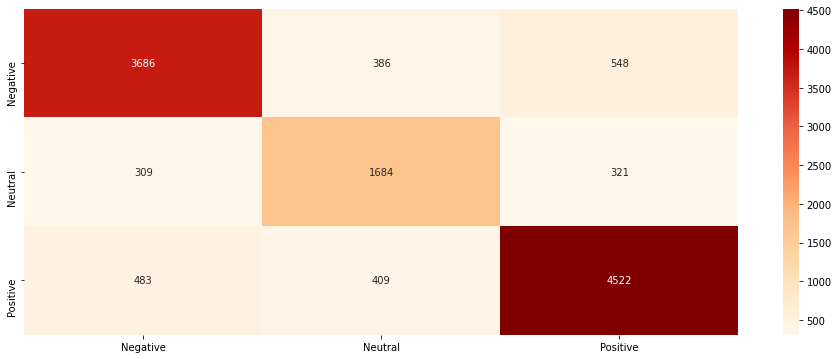

In [154]:
n_value={}
solver =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=41,stratify=y)
for n in solver:
    gm=LogisticRegression(solver=n)
    model=gm.fit(x_train,y_train)
    y_pr=model.predict(x_test)
    n_value[n]=round(accuracy_score(y_test, y_pr),2)
best_n=min(n_value,key=n_value.get)
print('Best Solver value is:{}'.format(max(n_value,key=n_value.get)))
print(n_value)

# Training Logistic Regression
gm=LogisticRegression(solver=best_n)
l_model=gm.fit(x_train,y_train)
y_pr=l_model.predict(x_test)
cm=confusion_matrix(y_test,y_pr)
print(y_pr[0:5])


print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
print('Precision:%.2f'%precision_score(y_test, y_pr,average='weighted'))
print('Recall:%.2f'%recall_score(y_test, y_pr,average='weighted'))
print('F1-Score:%.2f'%f1_score(y_test, y_pr,average='weighted'))
report=classification_report(y_test,y_pr)
print(report)

plt.figure(figsize=(16,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='OrRd',xticklabels=['Negative','Neutral','Positive'],yticklabels=['Negative','Neutral','Positive'])

In [180]:
output=predict_sentiment(l_model,'Thank you @MoSalah for your words of support. Vaccines work to save lives, including against #COVID19. We hope the world will team up to vaccinate people at highest risk everywhere! #VaccinEquity')
print(output)

Positive


### ***BernoulliNB***

[ 1 -1 -1  1  1]
Accuracy:0.67
Precision:0.67
Recall:0.67
F1-Score:0.64
              precision    recall  f1-score   support

          -1       0.69      0.74      0.71      4620
           0       0.69      0.17      0.28      2314
           1       0.65      0.82      0.72      5414

    accuracy                           0.67     12348
   macro avg       0.68      0.58      0.57     12348
weighted avg       0.67      0.67      0.64     12348



<AxesSubplot:>

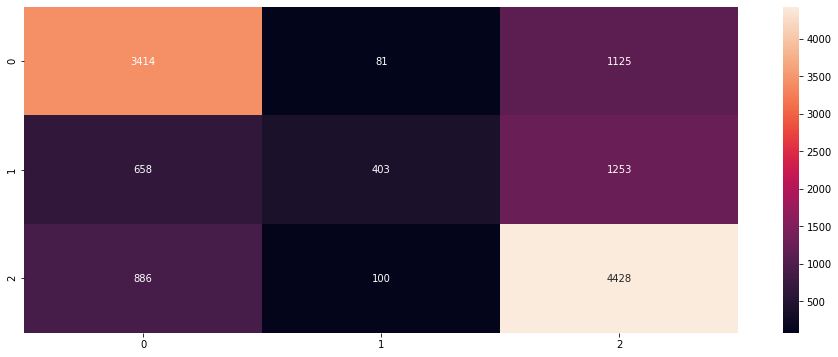

In [183]:
# Training Bernoulli Naive Bayes Model
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12,stratify=y)
gm=BernoulliNB()
model=gm.fit(x_train,y_train)
y_pr=model.predict(x_test)
cm=confusion_matrix(y_test,y_pr)
print(y_pr[0:5])

print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
print('Precision:%.2f'%precision_score(y_test, y_pr,average='weighted'))
print('Recall:%.2f'%recall_score(y_test, y_pr,average='weighted'))
print('F1-Score:%.2f'%f1_score(y_test, y_pr,average='weighted'))
report=classification_report(y_test,y_pr)
print(report)

plt.figure(figsize=(16,6))
sns.heatmap(cm,annot=True,fmt='d')

Above all the algorithms Logistic Regression is giving the good result.

### ***XGBClassifier***

[19:26:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[-1 -1  0 -1  0]
Accuracy:0.81
Precision:0.81
Recall:0.81
F1-Score:0.81
              precision    recall  f1-score   support

          -1       0.83      0.79      0.81      4620
           0       0.71      0.81      0.76      2314
           1       0.85      0.83      0.84      5414

    accuracy                           0.81     12348
   macro avg       0.80      0.81      0.80     12348
weighted avg       0.81      0.81      0.81     12348



<AxesSubplot:>

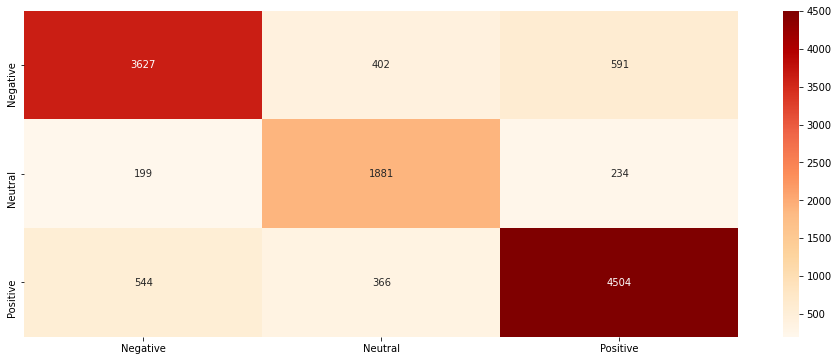

In [192]:
from xgboost import XGBClassifier
xgb= XGBClassifier(random_state=41,learning_rate=0.9)
xgb_model=xgb.fit(x_train,y_train)
y_pr=xgb_model.predict(x_test)
cm=confusion_matrix(y_test,y_pr)
print(y_pr[0:5])

print('Accuracy:{}'.format(round(accuracy_score(y_test, y_pr),2)))
print('Precision:%.2f'%precision_score(y_test, y_pr,average='weighted'))
print('Recall:%.2f'%recall_score(y_test, y_pr,average='weighted'))
print('F1-Score:%.2f'%f1_score(y_test, y_pr,average='weighted'))
report=classification_report(y_test,y_pr)
print(report)

plt.figure(figsize=(16,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='OrRd',xticklabels=['Negative','Neutral','Positive'],yticklabels=['Negative','Neutral','Positive'])

In [193]:
output=predict_sentiment(xgb_model,'Thank you @MoSalah for your words of support. Vaccines work to save lives, including against #COVID19. We hope the world will team up to vaccinate people at highest risk everywhere! #VaccinEquity')
print(output)

Positive
